# Eder Medina
## Homework 2

### APMTH 207: Stochastic Methods for Data Analysis, Inference and Optimization


## Problem 1: Monte Carlo Integration

Let $X$ be a random variable with distribution described by the following pdf:

$$
f_X(x) = \begin{cases}
\frac{1}{12}(x-1), &1\leq x\leq 3\\
-\frac{1}{12}(x-5), &3< x\leq 5\\
\frac{1}{6}(x-5), &5< x\leq 7\\
-\frac{1}{6}(x-9), &7< x\leq 9\\
0, &otherwise
\end{cases}
$$

Let $h$ be the following function of $X$:

$$
h(X) = \frac{1}{3\sqrt{2}\pi}\mathrm{exp}\left\{ -\frac{1}{18}\left( X - 5\right)^2\right\}
$$


In [2]:
%matplotlib inline
plt
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

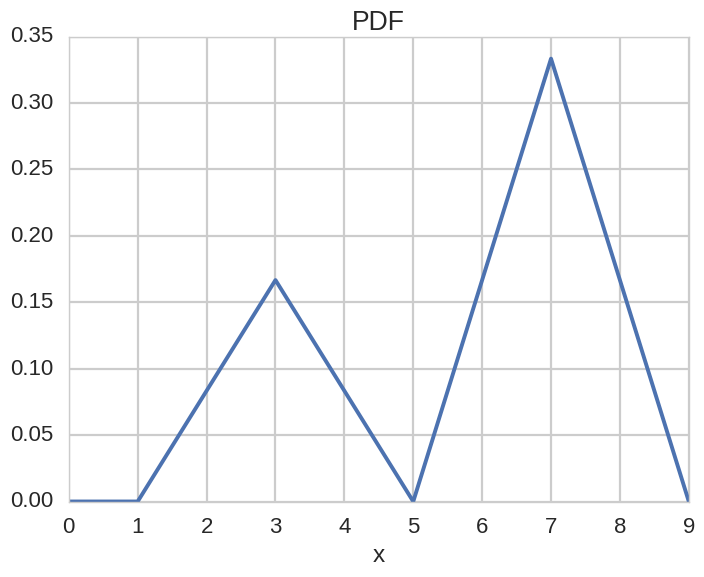

In [18]:
# PDF 
def  fx(x):
    if (x >= 1 and x <= 3):
        return 1./12*(x-1)
    elif(x > 3 and x <= 5):
        return -1./12*(x-5)
    elif(x > 5 and x <= 7):
        return 1/6*(x-5)
    elif(x > 7 and x <= 9):
        return -1./6*(x-9)
    else:
        return 0

# Function we are trying to estimate
def h(x):
    return 1.0/(3*np.sqrt(2)*np.pi)*np.exp(-1/18*(x-5)**2)

x = np.linspace(0,9,100)
x.size
y = np.zeros(x.size)
for i in range(x.size):
    y[i] = fx(x[i])

plt.figure(figsize=[8,6])
plt.plot(x,y)
plt.title("PDF")
plt.xlabel("x")

### Inverse Transform ###
We compute the CDF by integrating the PDF
$$
F_X(x) = \begin{cases}
0 , &x < 1 \\
\frac{1}{12}(\frac{x^2}{2}-x)+\frac{1}{24}, &1\leq x\leq 3\\
-\frac{1}{12}(\frac{x^2}{2}-5x)-\frac{17}{24}, &3< x\leq 5\\
\frac{1}{6}(\frac{x^2}{2}-5x)+\frac{29}{12}, &5< x\leq 7\\
-\frac{1}{6}(\frac{x^2}{2}-9x)-5.75, &7< x\leq 9\\
1 &x >9
\end{cases}
$$

We can compute the inverse cdf for each interval. For example, for the first interval we know that the $P(x<3)= 1/6$ then for values of $ r < 1/6$, where $r$ is defined by $P(x<X)= r$, we can compute the inverse transform by a quadratic equation
\begin{align}
r & = \frac{1}{12}(\frac{x^2}{2}-x)+\frac{1}{24}\\
& \frac{1}{12}(\frac{x^2}{2}-x)+\frac{1}{24} -r = 0 \\
x & = 1+\sqrt{1-4(\frac{1}{2})(\frac{1}{2}-12r)}
\end{align}

This is then repeated for the remaining intervals. See function "invCDF" for the equations. 

In [4]:
# Define the CDF
def CDF(x):
    if (x >= 1 and x <= 3):
        return 1./12*(0.5*x*x-x)+1./24
    elif(x > 3 and x <= 5):
        return -1./12*(0.5*x*x-5*x)-17./24
    elif(x > 5 and x <= 7):
        return 1/6*(0.5*x*x-5*x)+29./12
    elif(x > 7 and x <= 9):
        return -1./6*(0.5*x*x-9*x)-5.75
    else:
        return 0

# Invert the CDF 
def invCDF(r):
    if (r<=1.0/6):
        return 1+np.sqrt(1-4*(1/2-12*r)*0.5)
    elif (r > 1.0/6 and r<= 1.0/3):
        return 5-np.sqrt(25-4*(17/2+12*r)*0.5)
    elif (r > 1.0/3 and r<= 2.0/3):
        return 5+np.sqrt(25-4*(29/2-6*r)*0.5)
    elif (r > 2.0/3 and r <= 1):
        return 9-np.sqrt(81-4*(6*5.75+6*r)*0.5)


In [70]:
N_samples = 10000
M_sets= 1000

r_i = np.random.uniform(0,1,N_samples)
x_i = np.zeros(r_i.size)
h_i = np.zeros(x_i.size)

h_exp_inv=np.zeros(M_sets)
for j in range(M_sets):
    r_i = np.random.uniform(0,1,N_samples)
    for i in range(h_i.size):
        x_i[i] = invCDF(r_i[i])
        h_i[i] = h(x_i[i])
    h_exp_inv[j] = np.mean(h_i)

print("Inverse Transform Expect Value: ", np.mean(h_exp_inv))

Inverse Transform Expect Value:  0.0588595275195


### Rejection Sampling Uniform ###

From the PDF plot above we are able to see that there is a global max to our function at $x = 7$. As a result we find that the upper bound is 1/3.

Count 26423 Accepted 10000
Rejected Uniform Expect Value:  0.0588590429672


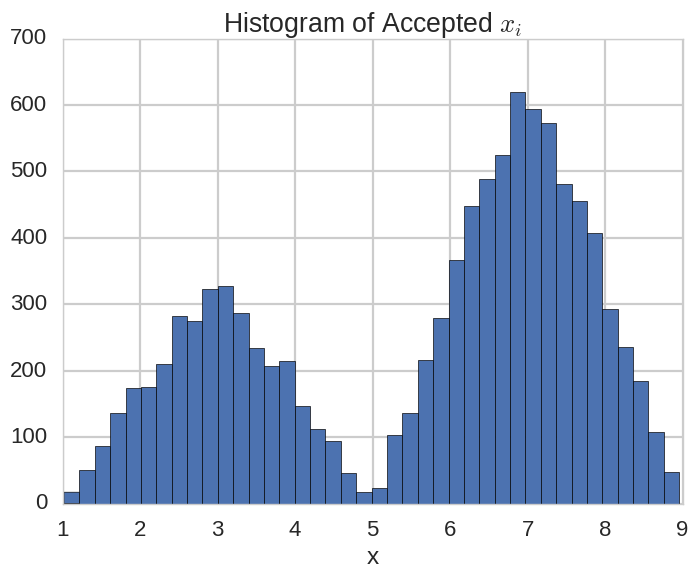

In [232]:
x_min = 1; x_max = 9;
y_max = .335;

h_exp_reju = np.zeros(M_sets);
for j in range(M_sets):
    count = 0; 
    accepted = 0;
    x_rej = np.zeros(N_samples)

    while (accepted < N_samples):
        xt = np.random.uniform(x_min,x_max)
        yt = np.random.uniform(0, y_max)
    
        if yt < fx(xt):
            x_rej[accepted] = xt
            accepted+=1
    
        count+=1



    h_rej = np.zeros(N_samples)
    for i in range(N_samples):
        h_rej[i] = h(x_rej[i])

    h_exp_reju[j] = np.mean(h_rej);

print("Count",count, "Accepted", accepted)
plt.figure(figsize=[8,6])
plt.hist(x_rej,bins=40, label=u'Samples');
plt.xlabel('x')
plt.title(u"Histogram of Accepted $x_i$")
print("Rejected Uniform Expect Value: ", np.mean(h_exp_reju))

### Rejection Sampling Steroids ###

Count 26061 Accepted 10000
Rejected Normal Expect Value:  0.0588572291158


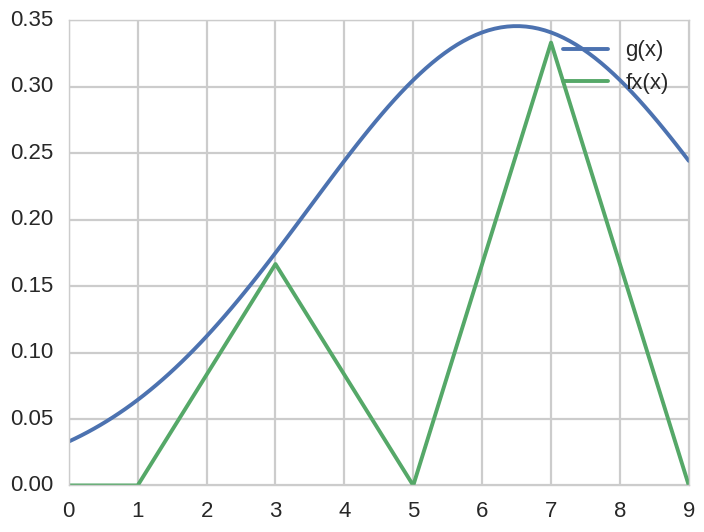

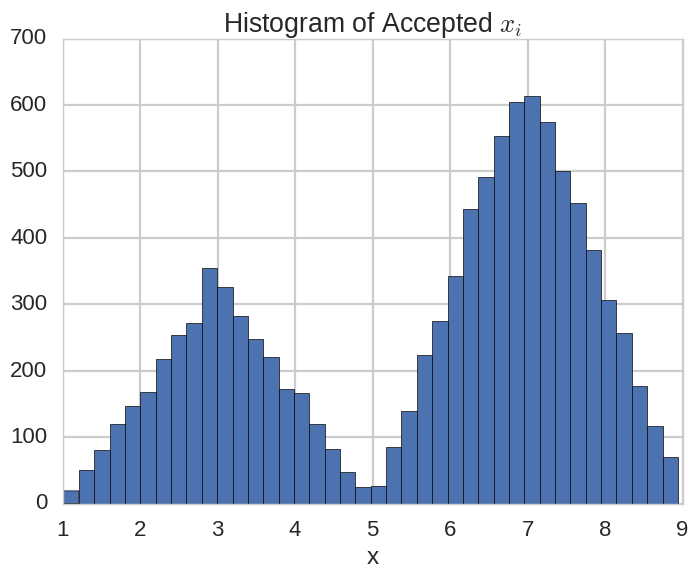

In [228]:
plt.figure(figsize=[8,6])
sigma = 3
mu = 6.5
scale = 2.6
plt.plot(x,scale*1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)),label= 'g(x)')
plt.plot(x,y, label = 'fx(x)')
plt.legend()

def g(x,mu,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

h_exp_rejn=np.zeros(M_sets)
for j in range(M_sets):
    count = 0; 
    accepted = 0;
    x_rej = np.zeros(N_samples)

    while (accepted < N_samples):
        xt = np.random.normal(mu,sigma)
        yt = np.random.uniform(0, 1)
    
        if yt < fx(xt)/(scale*g(xt,mu,sigma)):
            x_rej[accepted] = xt
            accepted+=1
    
        count+=1



    h_rej = np.zeros(N_samples)
    for i in range(N_samples):
        h_rej[i] = h(x_rej[i])

    h_exp_rejn[j] = np.mean(h_rej);

    
print("Count",count, "Accepted", accepted)
plt.figure(figsize=[8,6])
plt.hist(x_rej,bins=40, label=u'Samples');
plt.xlabel('x')
plt.title(u"Histogram of Accepted x_i")

print("Rejected Normal Expect Value: ", np.mean(h_exp_rejn))

### Importance Sampling Uniform ###

In [79]:
x_min = 1; x_max = 9;

h_impu = np.zeros(N_samples)
h_exp_impu =np.zeros(M_sets)
for j in range(M_sets):
    x_i  = np.random.uniform(x_min, x_max,N_samples);
    for i in range(N_samples):
        h_impu[i] = fx(x_i[i])*8*h(x_i[i])
    
    h_exp_impu[j] = np.mean(h_impu);
print("Importance Uniform Expect Value: ", np.mean(h_exp_impu))

Importance Uniform Expect Value:  0.0588490189728


### Importance Sampling Normal ###

In [80]:
x_min = 1; x_max = 9;

h_impn = np.zeros(N_samples)
h_exp_impn=np.zeros(M_sets)
for j in range(M_sets):
    x_i  = np.random.normal(mu, sigma,N_samples)
    for i in range(N_samples):
        h_impn[i] = fx(x_i[i])/(g(x_i[i],mu,sigma))*h(x_i[i])
    
    h_exp_impn[j]= np.mean(h_impu);
print("Importance Normal Expect Value: ", np.mean(h_exp_impn))

Importance Normal Expect Value:  0.0588742567252


### Summary of Results ###

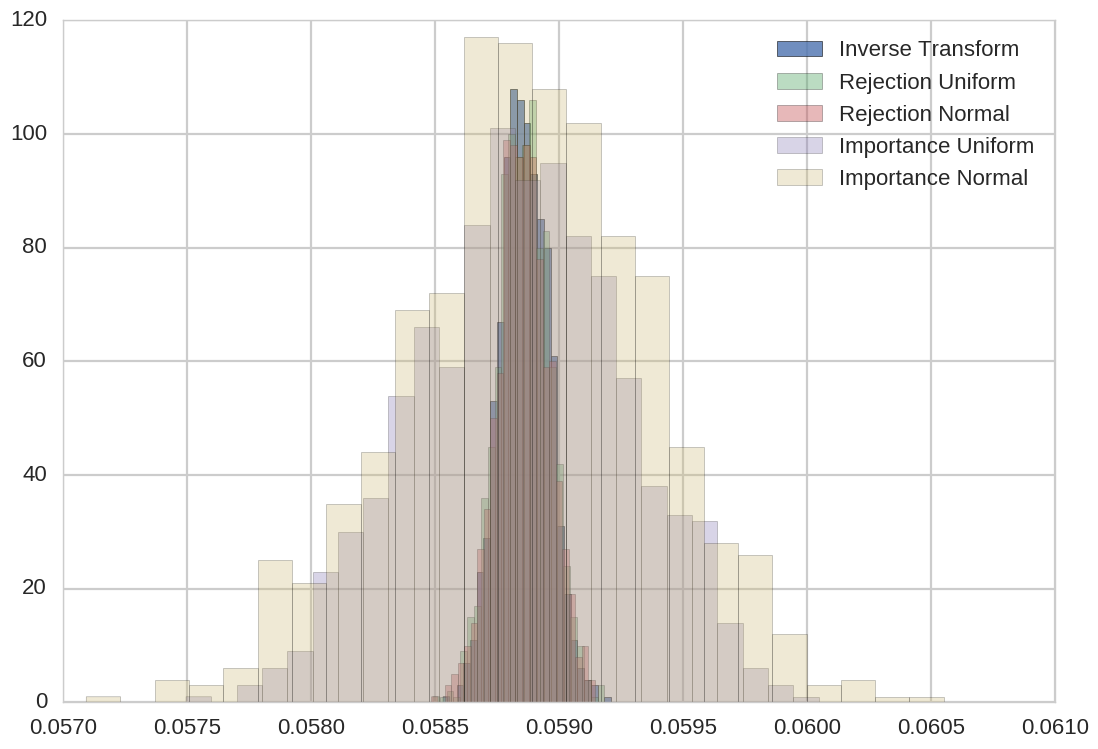

In [248]:
plt.hist(h_exp_inv, bins=25, alpha = 0.8, label = 'Inverse Transform');
plt.hist(h_exp_reju, bins =25, alpha = 0.4, label = 'Rejection Uniform');
plt.hist(h_exp_rejn, bins =25, alpha = 0.4, label = 'Rejection Normal');
plt.hist(h_exp_impu, bins =25, alpha = 0.3, label = 'Importance Uniform');
plt.hist(h_exp_impn, bins =25, alpha = 0.3, label = 'Importance Normal');
plt.legend()


In [229]:
print("Inverse Expected Value",np.mean(h_exp_inv))
print("Rejection Uniform Expected Value",np.mean(h_exp_reju))
print("Rejection Normal Expected Value",np.mean(h_exp_rejn))
print("Importance Uniform Expected Value",np.mean(h_exp_impu))
print("Importance Normal Expected Value",np.mean(h_exp_impn))

Inverse Expected Value 0.0588595275195
Rejection Uniform Expected Value 0.0588522127039
Rejection Normal Expected Value 0.0588572291158
Importance Uniform Expected Value 0.0588490189728
Importance Normal Expected Value 0.0588742567252


Look at all of the sigy figys

## Problem 2: Variance Reduction

### Part A

Compute the variance of each estimate of $\mathbb{E}[h(X)]$ obtained in Problem 1. Based on the discussion on sampling methods in lecture, which sampling methods, proposal distributions is expected, in principle, to resulted in lower variances? How well do your results align with these expectations?

In [230]:
print("Variance Inverse: ",np.std(h_exp_inv)**2)
print("Variance Rejection Uniform: ",np.std(h_exp_reju)**2)
print("Variance Rejection Normal: ",np.std(h_exp_rejn)**2)
print("Variance Importance Uniform: ",np.std(h_exp_impu)**2)
print("Variance Importance Normal: ",np.std(h_exp_impn)**2)


Variance Inverse:  9.40809070967e-09
Variance Rejection Uniform:  1.01329928684e-08
Variance Rejection Normal:  1.10208956283e-08
Variance Importance Uniform:  1.76074914996e-07
Variance Importance Normal:  2.51504269811e-07


The values above are ranked in order of increasing variance. Those higher up are considered "better" in the sense that produce a result closer to the true expected value for a given simulation. That being said Rejection Sampling and Inverse Transforms are have their drawbacks. Rejection sampling leads to the generation of a lot of points that often get rejected. Additionally computing the inverse transform can be incredibly tedius and for complicated functions there may not always be a quick way to find the transform. 

Importance samplings leads to a large variance because it can overweight unimportant regions and underweight important regions. Whereas the other two methods do not rely on this.   

### Part B (Stratified Sampling)

Often, a complex integral can be computed with more ease if one can break up the domain of the integral into pieces and if on each piece of the domain the integral is simplified. 

- Find a natural way to divide the domain of $X$ and express $\mathbb{E}[h(X)]$ as a ***correctly*** weighted sum of integrals over the pieces of the domain of $X$. (This constitutes the essentials of Stratified Sampling)

- Estimate each integral in the summand using rejection sampling using a normal proposal distribution (with sensibly chosen parameters). From these, estimate $\mathbb{E}[h(X)]$.

- Compute the variance of your estimate of $\mathbb{E}[h(X)]$. Compare with the variance of your previous estimate of $\mathbb{E}[h(X)]$ (in Part A, using rejection sampling, a normal proposal distribution over the entire domain of $X$).

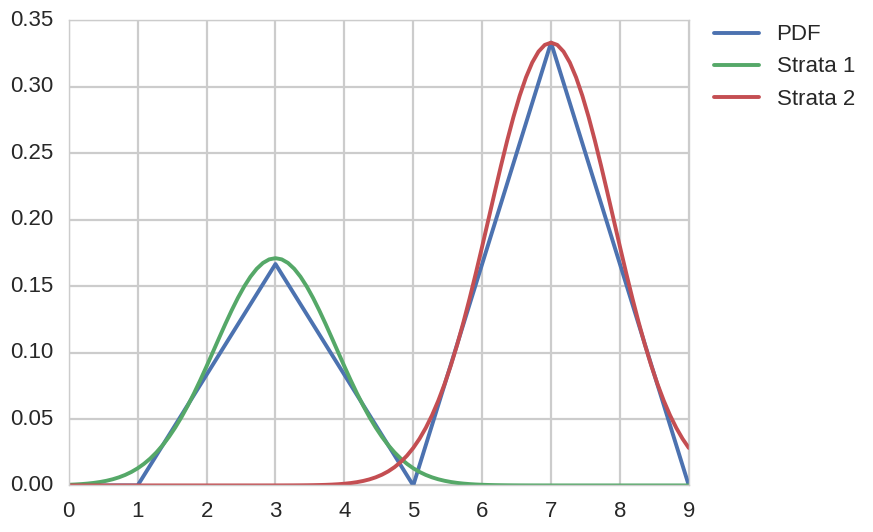

In [226]:
plt.figure(figsize= [8,6])
plt.plot(x,y,label = 'PDF')
xl = np.linspace(0,9,100)
yl = g(xl,3,.88)/2.65
yl2 = g(xl,7,.9)/1.33
plt.plot(xl,yl, label = 'Strata 1')
plt.plot(xl,yl2, label = 'Strata 2')
plt.legend(loc = 'center right',bbox_to_anchor=(1.3, .9))

In [231]:
h_exp_rejs=np.zeros(M_sets)
mu1 = 3
sig1=.88
sc1 = 1/2.65
mu2 = 7
sig2 =.9
sc2 = 1/1.33
x_rej1 = np.zeros(int(N_samples/2))
x_rej2 = np.zeros(int(N_samples/2))
h_rej1 = np.zeros(int(N_samples/2))
h_rej2 = np.zeros(int(N_samples/2))

for j in range(M_sets):
    count = 0; 
    accepted = 0;


    while (accepted < int(N_samples/2)):
        xt = np.random.normal(mu1,sig1)
        yt = np.random.uniform(0, 1)
    
        if (yt < fx(xt)/(sc1*g(xt,mu1,sig1))):
            x_rej1[accepted] = xt
            accepted+=1
    
        count+=1
    
    count = 0; 
    accepted = 0;

    while (accepted < int(N_samples/2)):
        xt = np.random.normal(mu2,sig2)
        yt = np.random.uniform(0, 1)
    
        if (yt < fx(xt)/(sc2*g(xt,mu2,sig2))):
            x_rej2[accepted] = xt
            accepted+=1
    
        count+=1



    for i in range(int(N_samples/2)):
        h_rej1[i] = h(x_rej1[i])
        h_rej2[i] = h(x_rej2[i])

    h_exp_rejs[j] = 1/3*np.mean(h_rej1)+2/3*np.mean(h_rej2);

print("Rejected Normal Expect Value: ", np.mean(h_exp_rejs))
print("Variance Stratified: ", np.std(h_exp_rejs)**2)

Rejected Normal Expect Value:  0.0590262836288
Variance Stratified:  1.17075520932e-08


One would expect for the variance to be decreased for stratified sampling method however we have found this not to be the case. A possible reason is that we have lucked out at chosen a really good proposal distribution function for our PDF. 